<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_util.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install segyio

     |████████████████████████████████| 92kB 2.3MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Read data

In [0]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

In [5]:
import segyio

with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = segyio.tools.cube(f)
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250


'The 99th percentile is 6517; the max amplitude is 32767'

# Slice seismic cube and display it

Import `seis_util` library

In [6]:
!git clone https://github.com/yohanesnuwara/computational-geophysics

Cloning into 'computational-geophysics'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (202/202), done.
remote: Total 209 (delta 103), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (209/209), 18.37 MiB | 7.98 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [0]:
import sys
sys.path.append('/content/computational-geophysics/seismic')

In [0]:
from seis_util import *

In [9]:
help(slicing)

Help on function slicing in module seis_util:

slicing(cube, type, loc, a_line)
    Slicing a seismic cube to inline section, crossline section, or timeslice section
    
    Input:
    
    cube: 3d numpy array, data (output of segyio read)
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    loc: the location of inline, crossline, or timeslice depends on the type
         you're choosing (integer/float)
    a_line: array of inline, crossline, and timeslice locations, depends on the 
            type you're choosing (1D numpy array)



In [10]:
help(display_slice)

Help on function display_slice in module seis_util:

display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)
    Display the slice
    
    Input:
    
    slices: the slice data, 2D numpy array
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, vmax = +percentile99, percentiles of the cube



In [10]:
print(inlines[:10])
print(crosslines[:10])
print(twt[:10])

[100 101 102 103 104 105 106 107 108 109]
[300 301 302 303 304 305 306 307 308 309]
[ 4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]


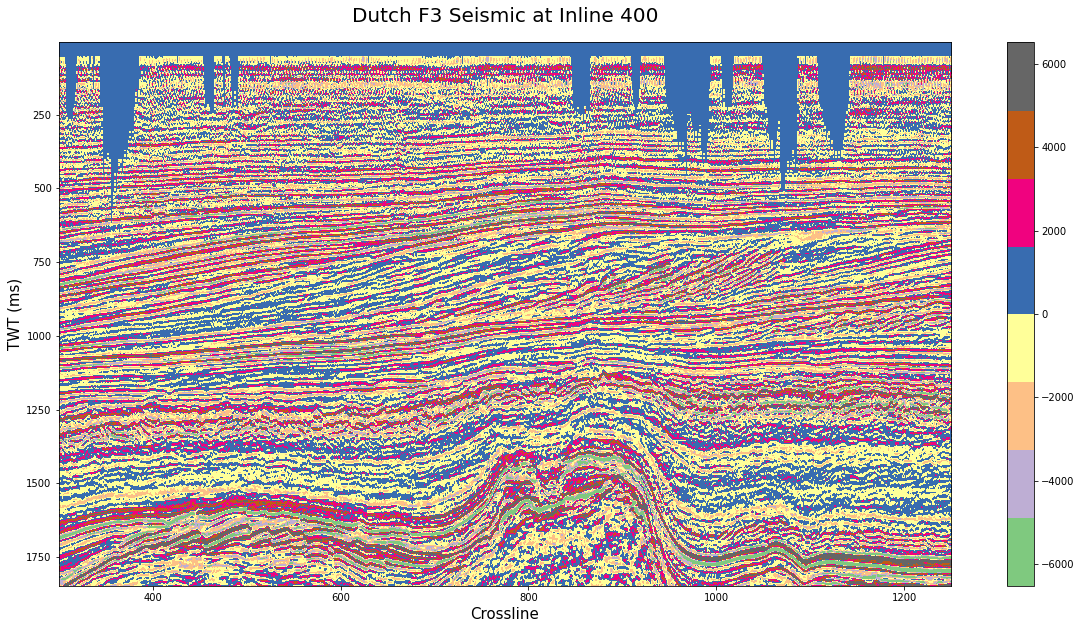

In [11]:
inline_number = 400

slices = slicing(data, 'il', inline_number, inlines)

plt.figure(figsize=(20,10))
display_slice(slices, 'il', crosslines, twt, 'Accent', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Inline {}'.format(inline_number), size=20, pad=20)
plt.xlabel('Crossline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

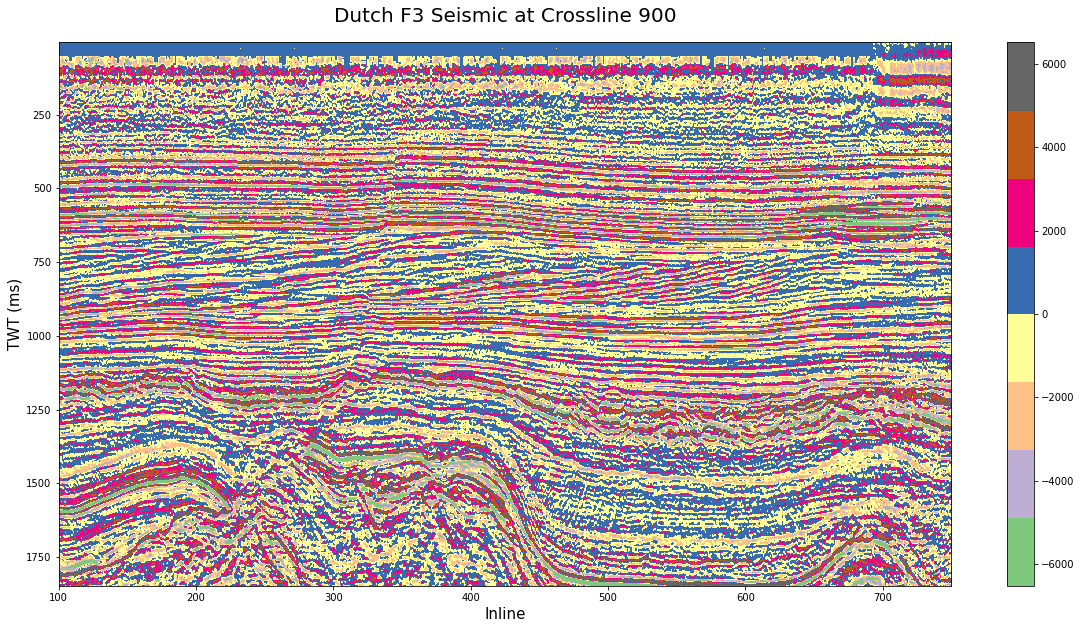

In [12]:
xline_number = 900

slices = slicing(data, 'xl', xline_number, crosslines)

plt.figure(figsize=(20,10))
display_slice(slices, 'xl', inlines, twt, 'Accent', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Crossline {}'.format(xline_number), size=20, pad=20)
plt.xlabel('Inline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

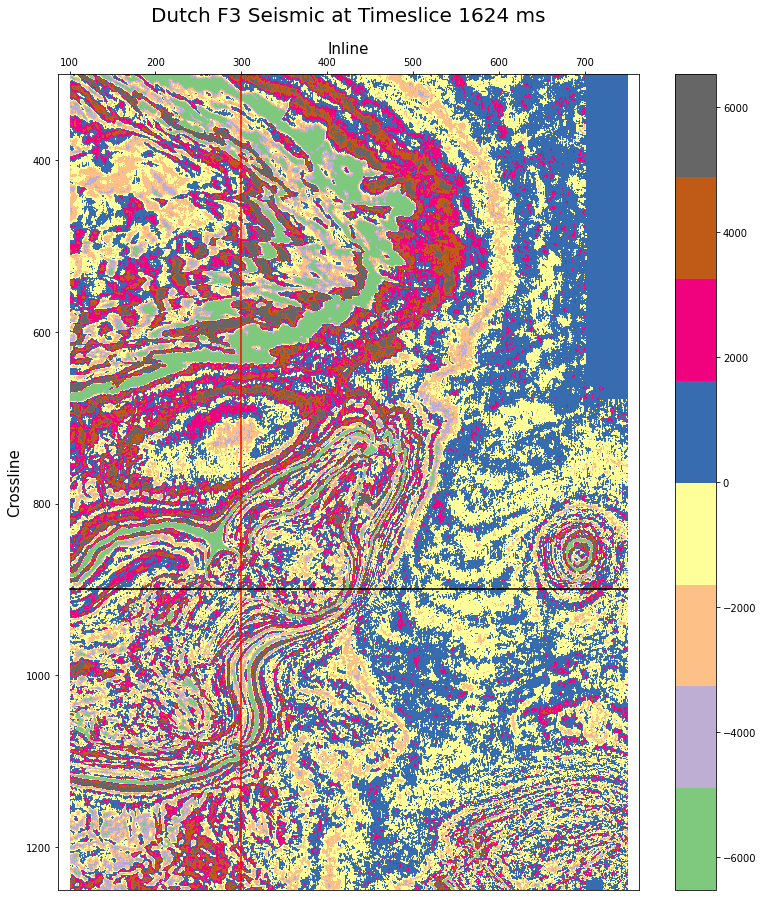

In [44]:
timeslice = 1624 # ms

slices = slicing(data, 'ts', timeslice, twt)

slices.shape

plt.figure(figsize=(13,15))
display_slice(slices, 'ts', inlines, crosslines, 'Accent', -vm, vm) # call function
plt.title('Dutch F3 Seismic at Timeslice {} ms'.format(timeslice), size=20, pad=20)
plt.plot([inline_number, inline_number], [min(crosslines), max(crosslines)], color='red')
plt.plot([min(inlines), max(inlines)], [xline_number, xline_number], color='black')
plt.xlabel('Inline', size=15); plt.ylabel('Crossline', size=15)
plt.gca().xaxis.set_ticks_position('top') # axis on top
plt.gca().xaxis.set_label_position('top') # label on top
plt.axis('equal')
plt.show()

# Frequency Spectrum

In [6]:
help(frequency_spectrum)

Help on function frequency_spectrum in module seis_util:

frequency_spectrum(data, type, il_array, xl_array, twt_array, sample_rate)
    Compute the frequency spectrum of the whole cube, inline, or crossline
    cube
    
    Input:
    
    data: if you choose 'whole', data must be in 3D numpy array, if you choose
          either 'il' or 'xl', data must be in 2D numpy array (you should make
          the slice first using 'slicing' function)
    type: 'whole' for the whole cube, 'il' for inline section, 'xl' for
          crossline section 
    
    il_array (inline), xl_array (xline), twt_array (time) depend on the type
    you're choosing.
    
    * If type = 'il', then il_array = None, specify your xl_array and twt_array
    * If type = 'xl', then xl_array = None, specify your il_array and twt_array
    * If type = 'whole', then specify all your il_array, xl_array, and twt_array
    
    sample_rate: sampling rate of seismic data (in second) 
    
    Output:
    
    freq_seis: 

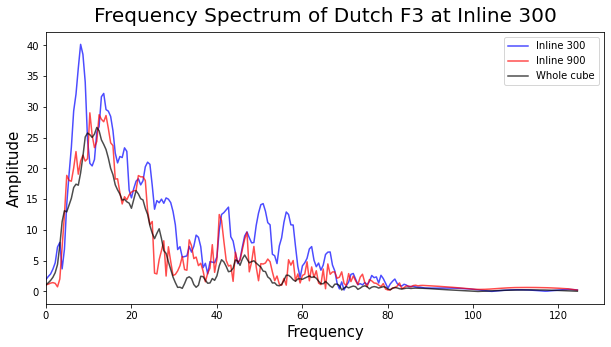

In [7]:
" slicing "

# inline slice
inline_number = 300
il_slices = slicing(data, 'il', inline_number, inlines)

# xline slice
xline_number = 900
xl_slices = slicing(data, 'xl', xline_number, crosslines)

" compute frequency spectrum "

sample_rate = 0.004

# inline
il_freq, il_amp = frequency_spectrum(il_slices, 'il', None, crosslines, twt, sample_rate)

# xline
xl_freq, xl_amp = frequency_spectrum(xl_slices, 'xl', inlines, None, twt, sample_rate)

# whole cube
cube_freq, cube_amp = frequency_spectrum(data, 'whole', inlines, crosslines, twt, sample_rate)

# display frequency spectrum
plt.figure(figsize=(10,5))

plt.plot(il_freq, np.abs(il_amp), color='blue', alpha=.7, label='Inline {}'.format(inline_number))
plt.plot(xl_freq, np.abs(xl_amp), color='red', alpha=.7, label='Inline {}'.format(xline_number))
plt.plot(cube_freq, np.abs(cube_amp), color='black', alpha=.7, label='Whole cube')

plt.title('Frequency Spectrum of Dutch F3 at Inline {}'.format(inline_number), size=20, pad=10)
plt.legend()
plt.xlim(xmin=0)
plt.xlabel('Frequency', size=15); plt.ylabel('Amplitude', size=15)
plt.show()

# Attribute (interfacing `d2geo` attributes)

In [9]:
!git clone https://github.com/yohanesnuwara/d2geo

Cloning into 'd2geo'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 78 (delta 9), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (78/78), done.


In [0]:
import sys
sys.path.append('/content/d2geo/attributes')

In [12]:
help(attribute_input)

Help on function attribute_input in module seis_util:

attribute_input(slices, type)
    Preparing the input array for attribute processing, after that passed to d2geo
    
    Input:
    
    slices: inline, crossline, or time slices output of function `slicing`
            (2D numpy array)
    type: 'il' for inline, 'xl' for crossline, 'ts' for timeslice
    
    Output:
    
    darray: 3D numpy array, that will be passed to d2geo attributes



In [11]:
help(display_attribute)

Help on function display_attribute in module seis_util:

display_attribute(computed_attribute, type, b_line, c_line, cmap, vmin, vmax)
    Processing the output from d2geo attribute for matplotlib display
    
    Input:
    
    computed_attribute: output from the attribute computation (3D Dask array)
    type: 'il' for inline, 'xl' for crossline, 'ts' for timeslice
    
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, v

In [0]:
def attribute_input(slices, type):
  """
  Preparing the input array for attribute processing, after that passed to d2geo

  Input:

  slices: inline, crossline, or time slices output of function `slicing`
          (2D numpy array)
  type: 'il' for inline, 'xl' for crossline, 'ts' for timeslice

  Output:

  darray: 3D numpy array, that will be passed to d2geo attributes 
  """

  import numpy as np

  if type == 'il':
    darray = np.reshape(slices, slices.shape + (1,))
  
  if type == 'xl':
    darray = np.reshape(slices, slices.shape + (1,))    
  
  if type == 'ts':
    darray = np.reshape(np.transpose(slices), (np.transpose(slices)).shape + (1,))
  
  return(darray)

In [0]:
def display_attribute(computed_attribute, type, b_line, c_line, cmap, vmin, vmax):
  """
  Processing the output from d2geo attribute for matplotlib display

  Input:

  computed_attribute: output from the attribute computation (3D Dask array)
  type: 'il' for inline, 'xl' for crossline, 'ts' for timeslice

  b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                  type you're choosing (1D numpy array)
  * for 'il': b_line = crossline array, c_line = twt array
  * for 'xl': b_line = inline array, c_line = twt array
  * for 'ts': b_line = inline array, c_line = crossline array

  cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
        jet, Accent, ...)
  vmin, vmax: the minimum and maximum range for colormap. Many options:
  * None, None: normal and default plotting
  * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
  * vmin = -percentile99, vmax = +percentile99, percentiles of the cube

  Output:

  attribute_slice: 2D Numpy array
  """

  import numpy as np
  import matplotlib.pyplot as plt

  if type == 'il' or type == 'xl':
    trans_attr = computed_attribute.T
    reshape = trans_attr.reshape((trans_attr.shape[0], -1))

    extent = [b_line[0], b_line[-1], c_line[-1], c_line[0]]
    p1 = plt.imshow(reshape.T, vmin=vmin, vmax=vmax, aspect='auto', extent=extent, cmap=cmap)
    plt.colorbar(p1)

  if type == 'ts':
    trans_attr = computed_attribute.T
    reshape = trans_attr.reshape((trans_attr.shape[0], -1))

    extent = [b_line[0], b_line[-1], c_line[-1], c_line[0]]
    p1 = plt.imshow(reshape, vmin=vmin, vmax=vmax, aspect='auto', extent=extent, cmap=cmap)
    plt.colorbar(p1)    

In [109]:
help(display_attribute)

Help on function display_attribute in module __main__:

display_attribute(computed_attribute, type, b_line, c_line, cmap, vmin, vmax)
    Processing the output from d2geo attribute for matplotlib display
    
    Input:
    
    computed_attribute: output from the attribute computation (3D Dask array)
    type: 'il' for inline, 'xl' for crossline, 'ts' for timeslice
    
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, vm

## Inline

In [14]:
" slicing inline "

inline_number = 400
il_slices = slicing(data, 'il', inline_number, inlines)

from CompleTrace import ComplexAttributes

" preparing for input "

darray = attribute_input(il_slices, 'il')

y = ComplexAttributes()
darray, chunks_init = ComplexAttributes.create_array(y, darray, kernel=None)
darray

dask.array<array, shape=(951, 462, 1), dtype=float32, chunksize=(461, 461, 1), chunktype=numpy.ndarray>

In [15]:
" envelope attribute computation "

il_enve = ComplexAttributes.envelope(y, darray.T)
il_enve

dask.array<_trim, shape=(1, 462, 951), dtype=float32, chunksize=(1, 461, 461), chunktype=numpy.ndarray>

/content/d2geo/attributes/util.py:347: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


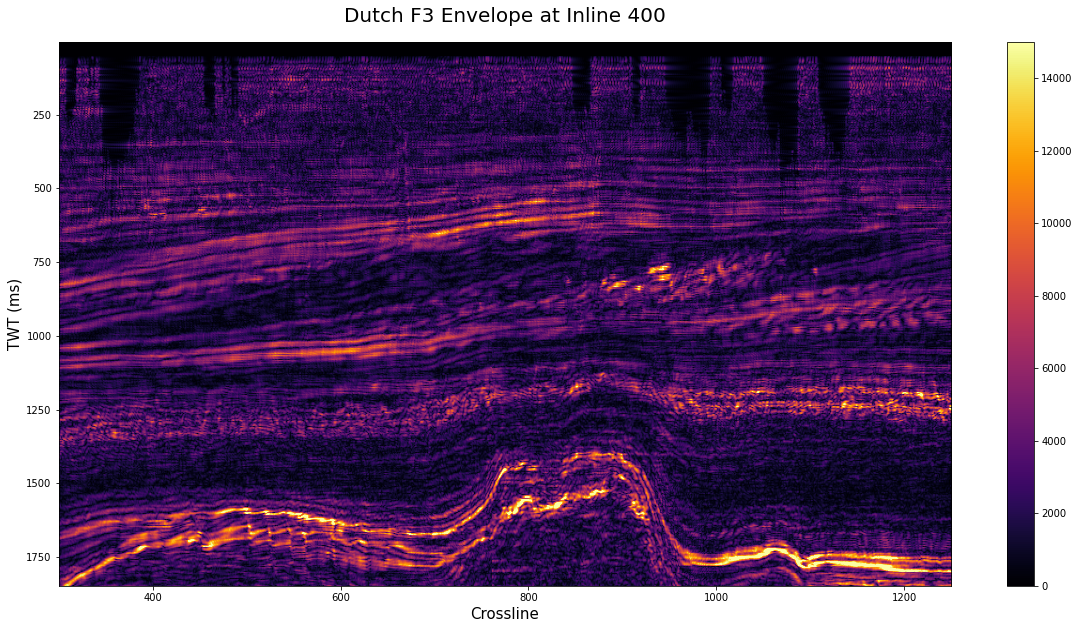

In [16]:
plt.figure(figsize=(20,10))
display_attribute(il_enve, 'il', crosslines, twt, 'inferno', 0, 15000)
plt.title('Dutch F3 Envelope at Inline {}'.format(inline_number), size=20, pad=20)
plt.xlabel('Crossline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

## Crossline

In [17]:
" slicing crossline "

xline_number = 900
xl_slices = slicing(data, 'xl', xline_number, crosslines)

from CompleTrace import ComplexAttributes

" preparing for input "

darray = attribute_input(xl_slices, 'xl')

y = ComplexAttributes()
darray, chunks_init = ComplexAttributes.create_array(y, darray, kernel=None)
darray

dask.array<array, shape=(651, 462, 1), dtype=float32, chunksize=(461, 461, 1), chunktype=numpy.ndarray>

In [18]:
" envelope attribute computation "

xl_enve = ComplexAttributes.envelope(y, darray.T)
xl_enve

dask.array<_trim, shape=(1, 462, 651), dtype=float32, chunksize=(1, 461, 461), chunktype=numpy.ndarray>

/content/d2geo/attributes/util.py:347: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


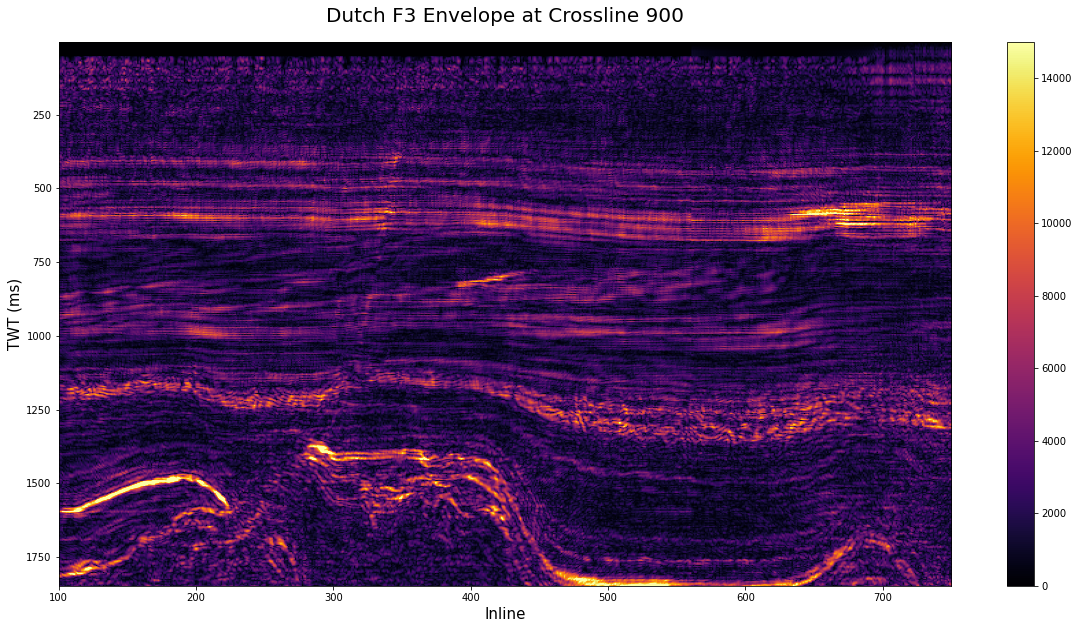

In [19]:
plt.figure(figsize=(20,10))
display_attribute(xl_enve, 'xl', inlines, twt, 'inferno', 0, 15000)
plt.title('Dutch F3 Envelope at Crossline {}'.format(xline_number), size=20, pad=20)
plt.xlabel('Inline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

## Timeslice

In [20]:
" slicing timeslice "

timeslice = 1624 # ms
ts_slices = slicing(data, 'ts', timeslice, twt)

from CompleTrace import ComplexAttributes

" preparing for input "

darray = attribute_input(ts_slices, 'ts')

y = ComplexAttributes()
darray, chunks_init = ComplexAttributes.create_array(y, darray, kernel=None)
darray

dask.array<array, shape=(951, 651, 1), dtype=float32, chunksize=(650, 650, 1), chunktype=numpy.ndarray>

In [21]:
" envelope attribute computation "

ts_enve = ComplexAttributes.envelope(y, darray.T)
ts_enve

dask.array<_trim, shape=(1, 651, 951), dtype=float32, chunksize=(1, 650, 650), chunktype=numpy.ndarray>

/content/d2geo/attributes/util.py:347: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


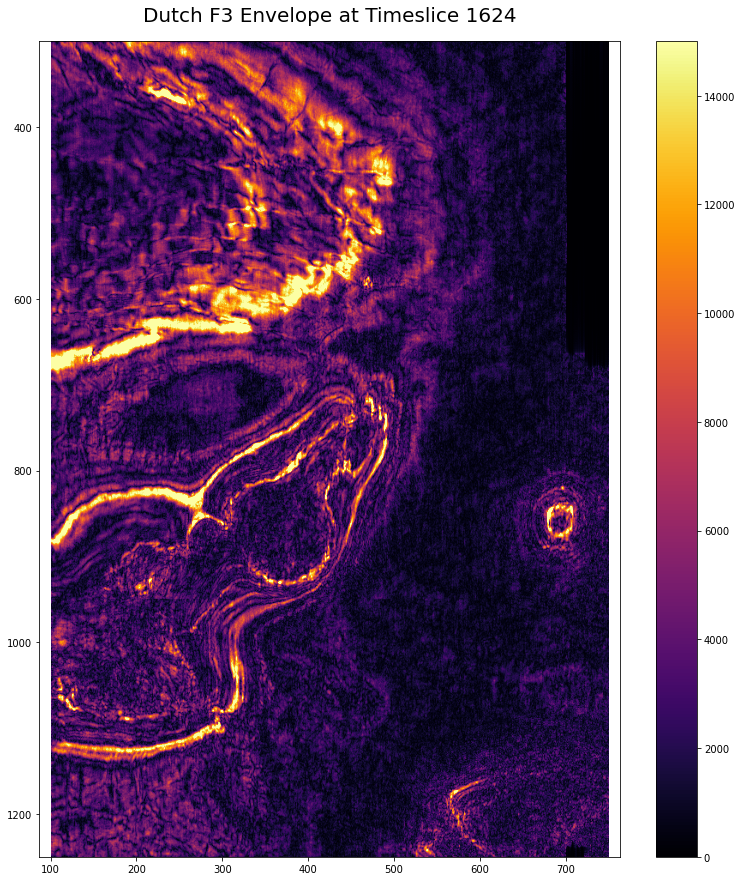

In [22]:
plt.figure(figsize=(13,15))
display_attribute(ts_enve, 'ts', inlines, crosslines, 'inferno', 0, 15000)
plt.title('Dutch F3 Envelope at Timeslice {}'.format(timeslice), size=20, pad=20)
# plt.xlabel('Inline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.axis('equal')
plt.show()